<a href="https://colab.research.google.com/github/Belal42-O/Telecom-Customer-Churn-Prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Customer Churn Prediction

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [94]:
!pip install catboost

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [96]:
data = pd.read_csv("data.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
data.isnull().any().any()

np.False_

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
data.shape

(7043, 21)

##Visualize missing values

<Axes: >

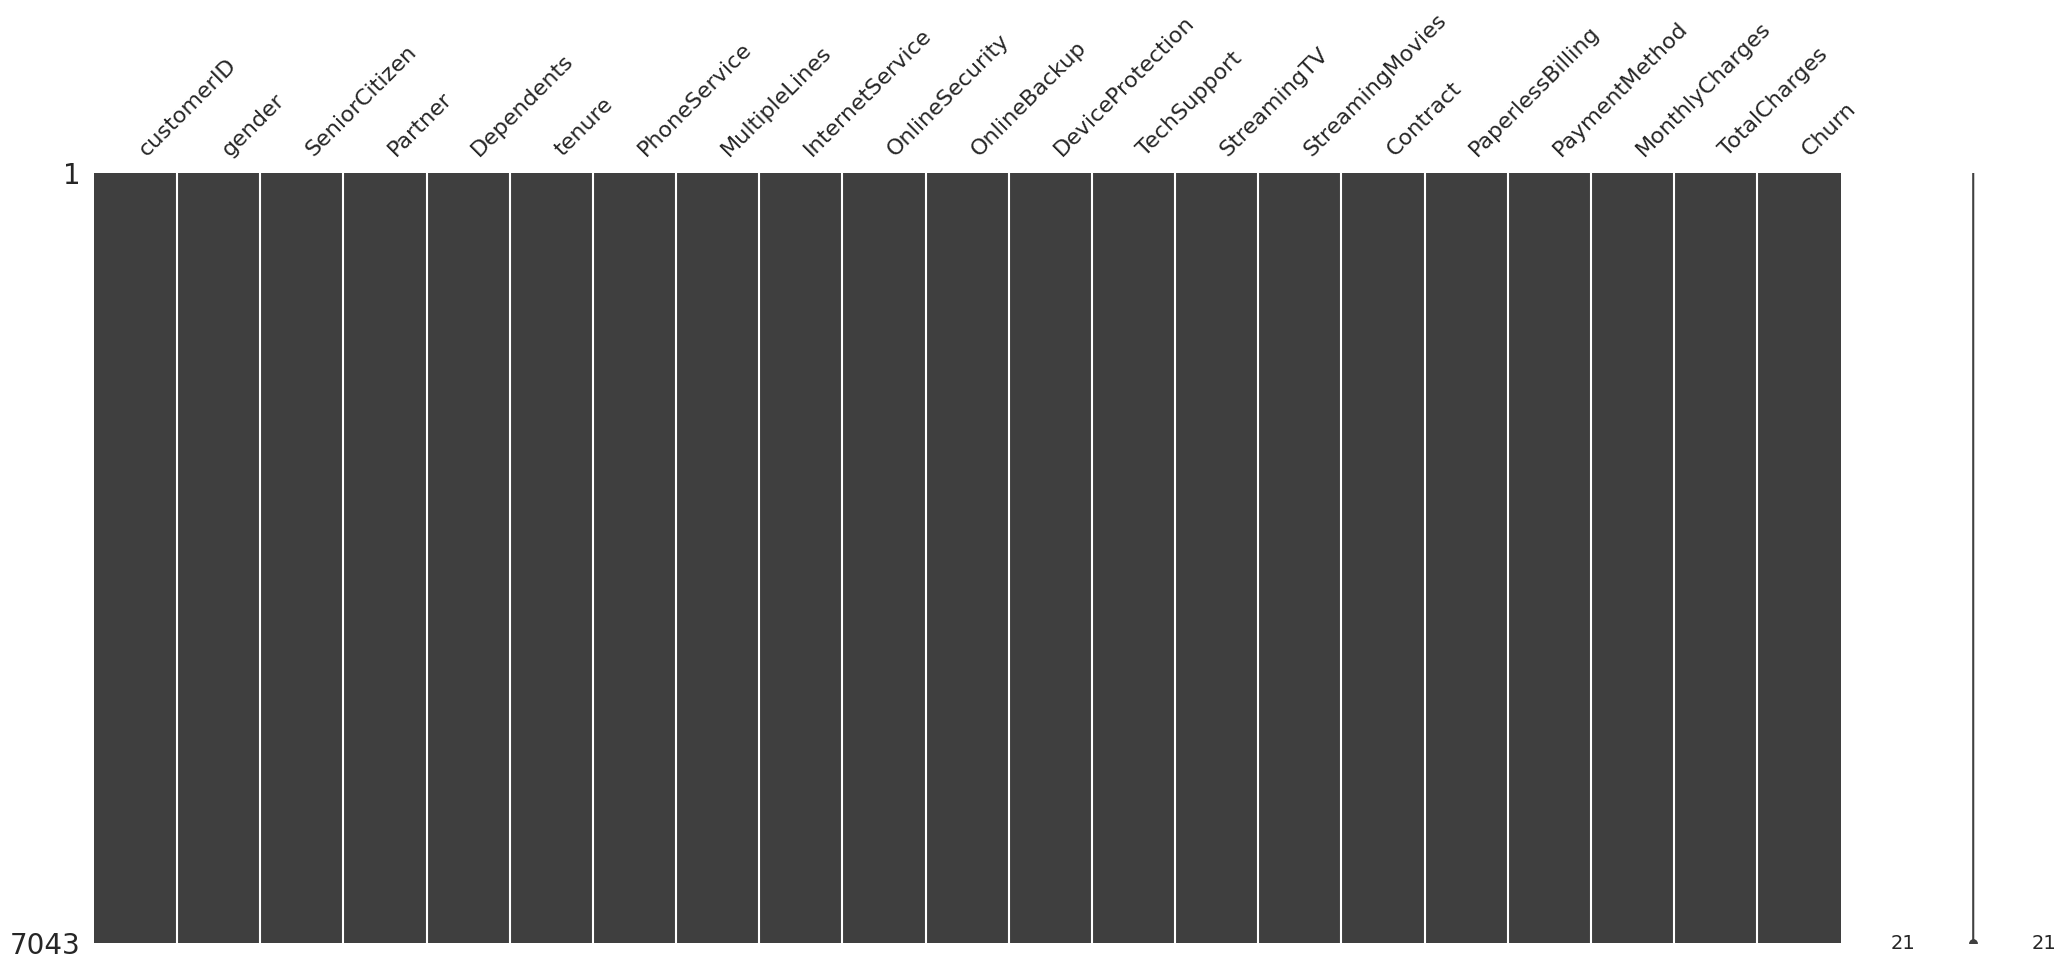

In [100]:
import missingno as msno
msno.matrix(data)

In [101]:
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:

data[data["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [103]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


##There are 11 records with missing Total charges

In [104]:
data[data["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [105]:
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)
data.fillna(data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [106]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [107]:
data.SeniorCitizen.unique()

array([0, 1])

In [108]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
data.InternetService.describe(include=["object", "bool"])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


##EDA

In [110]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [111]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

,Churn
gender,
Female,2544
Male,2619


In [112]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()

,Churn
gender,
Female,939
Male,930


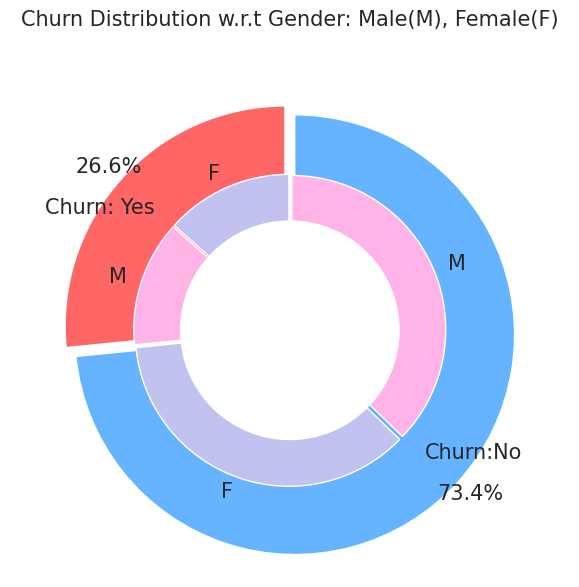

In [113]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [114]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

##Customers with monthly contract are more likely to churn

In [115]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [116]:
data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [117]:
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [118]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


In [119]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [120]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [121]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [122]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [123]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

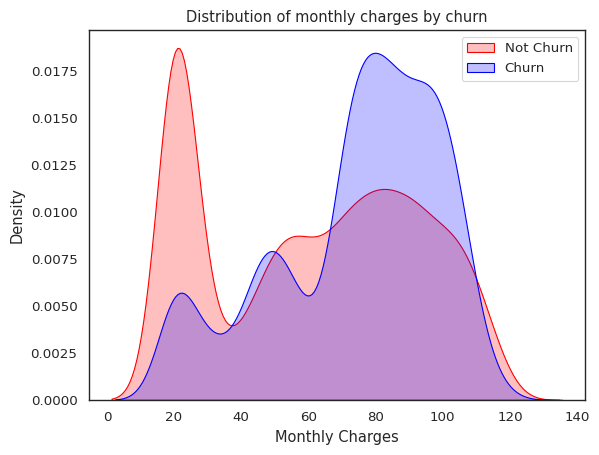

In [124]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

##Customers with higher monthly charges are more likely to churn

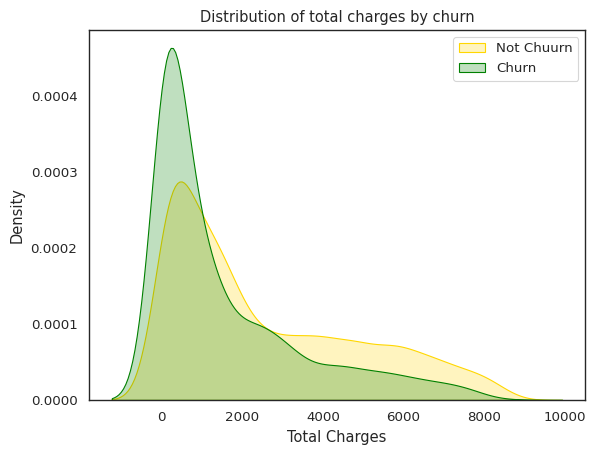

In [125]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [126]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


In [127]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique
values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

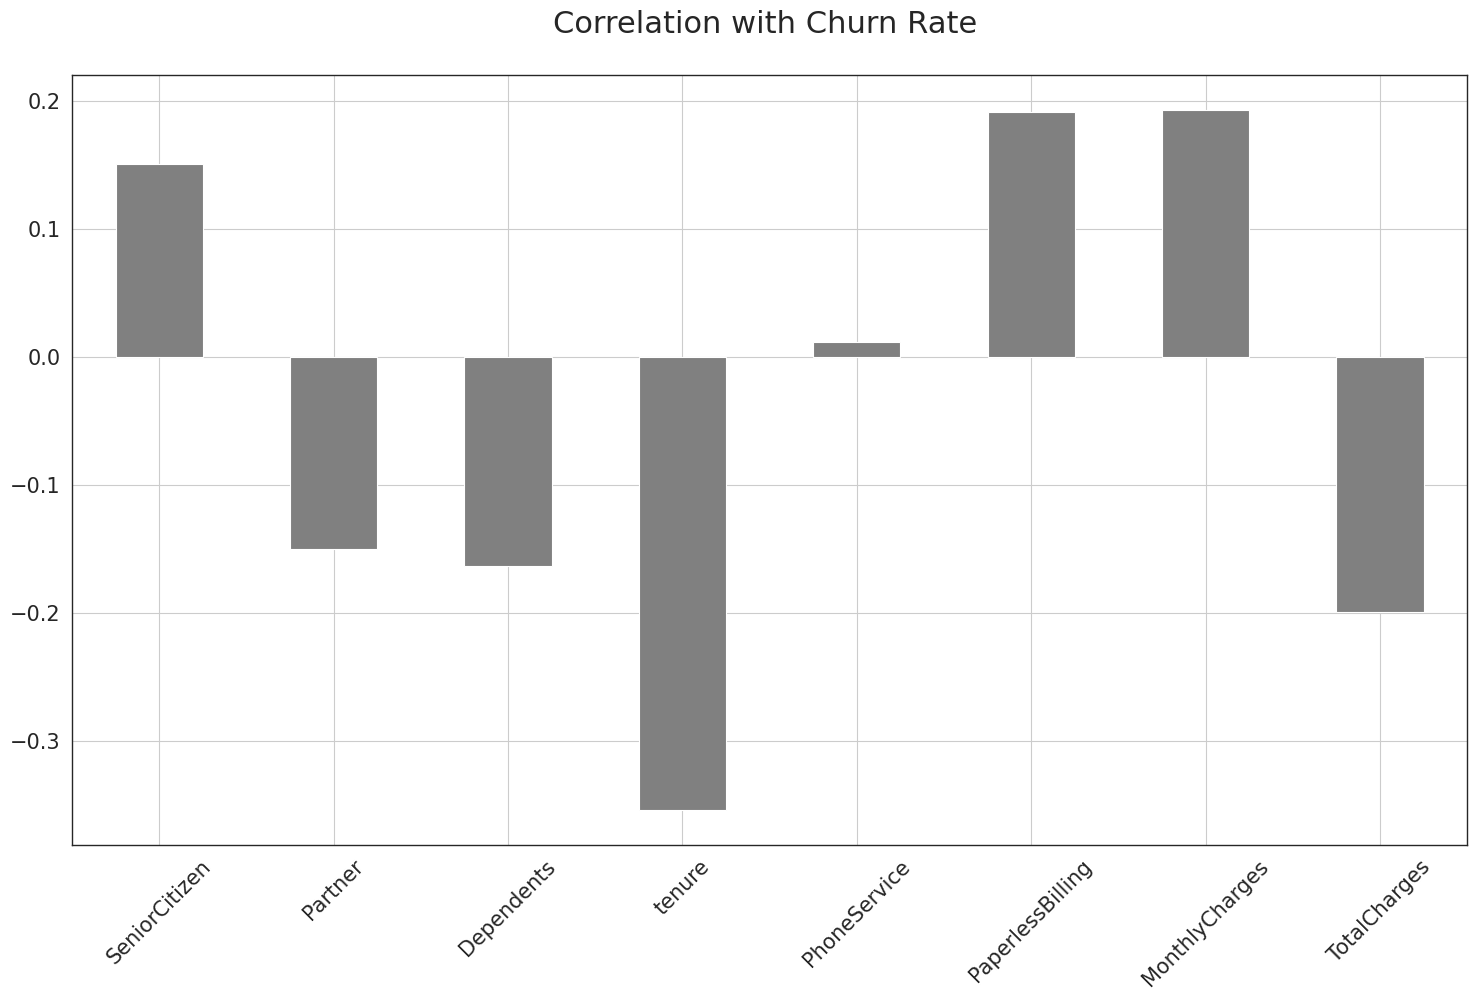

In [128]:
data2 = data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = data2.corrwith(data.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

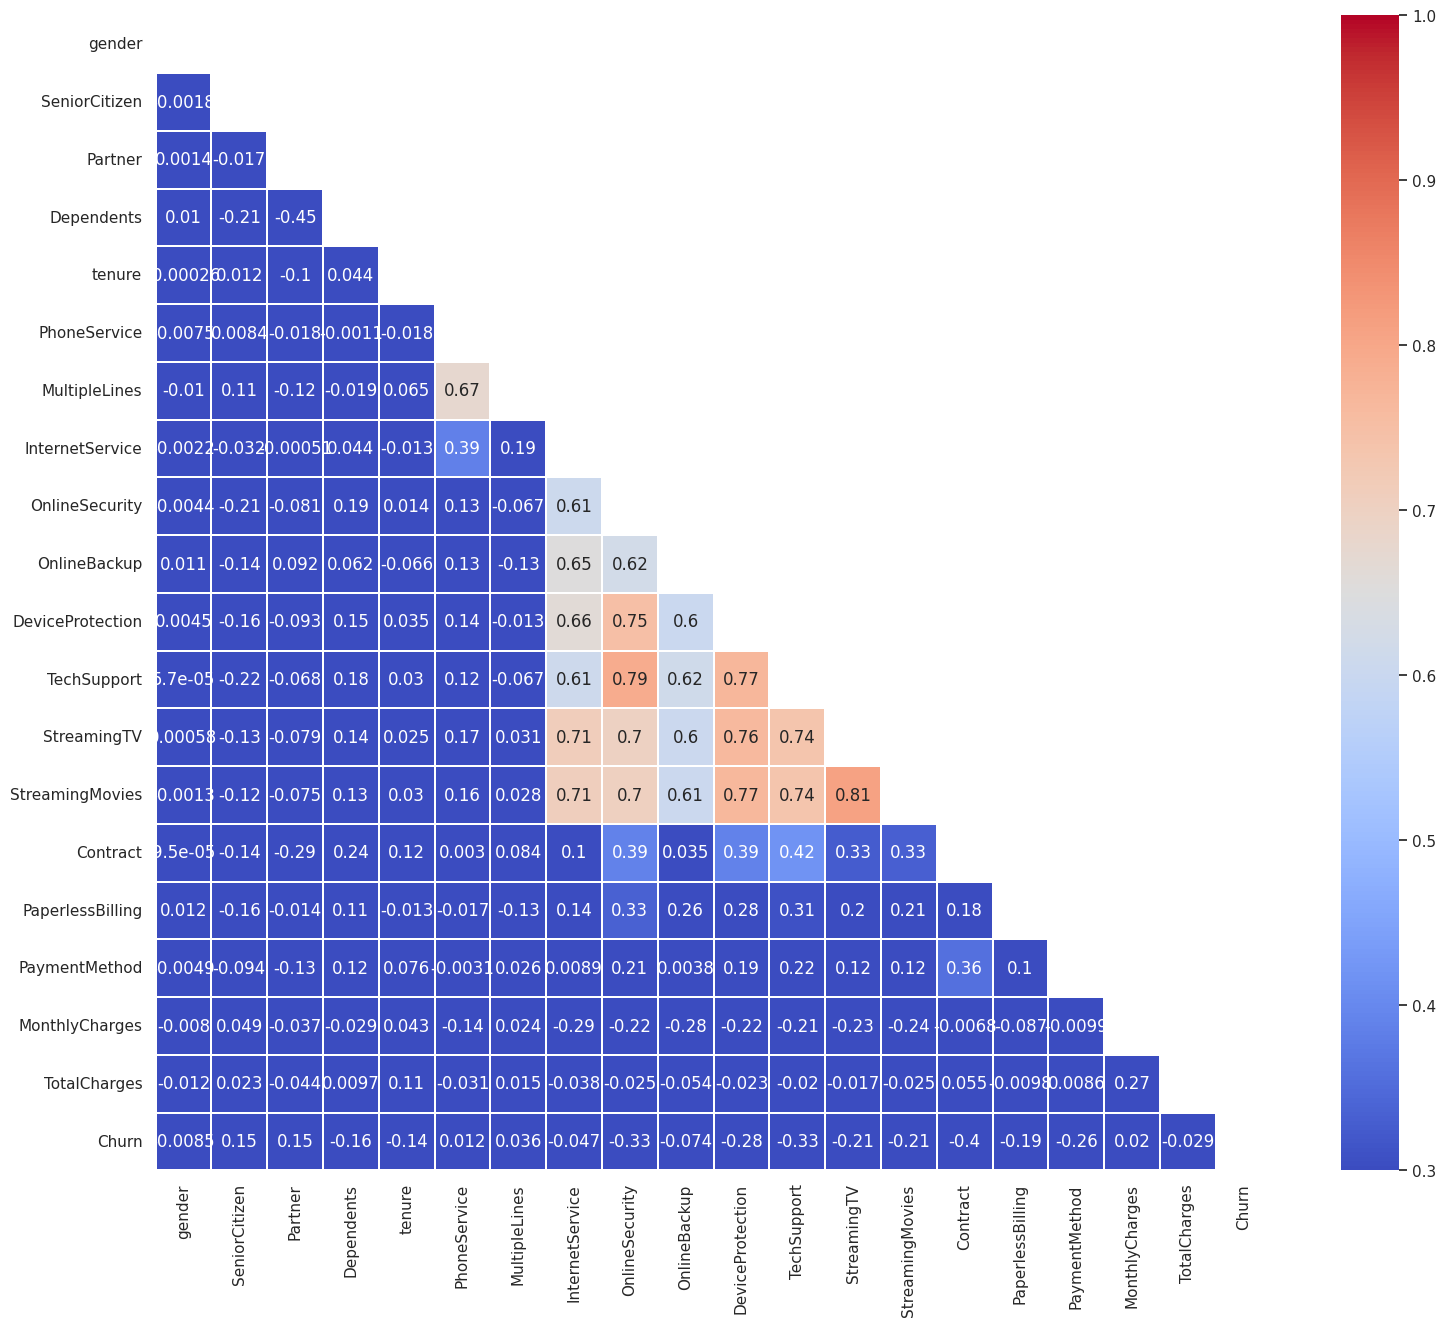

In [129]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<Axes: >

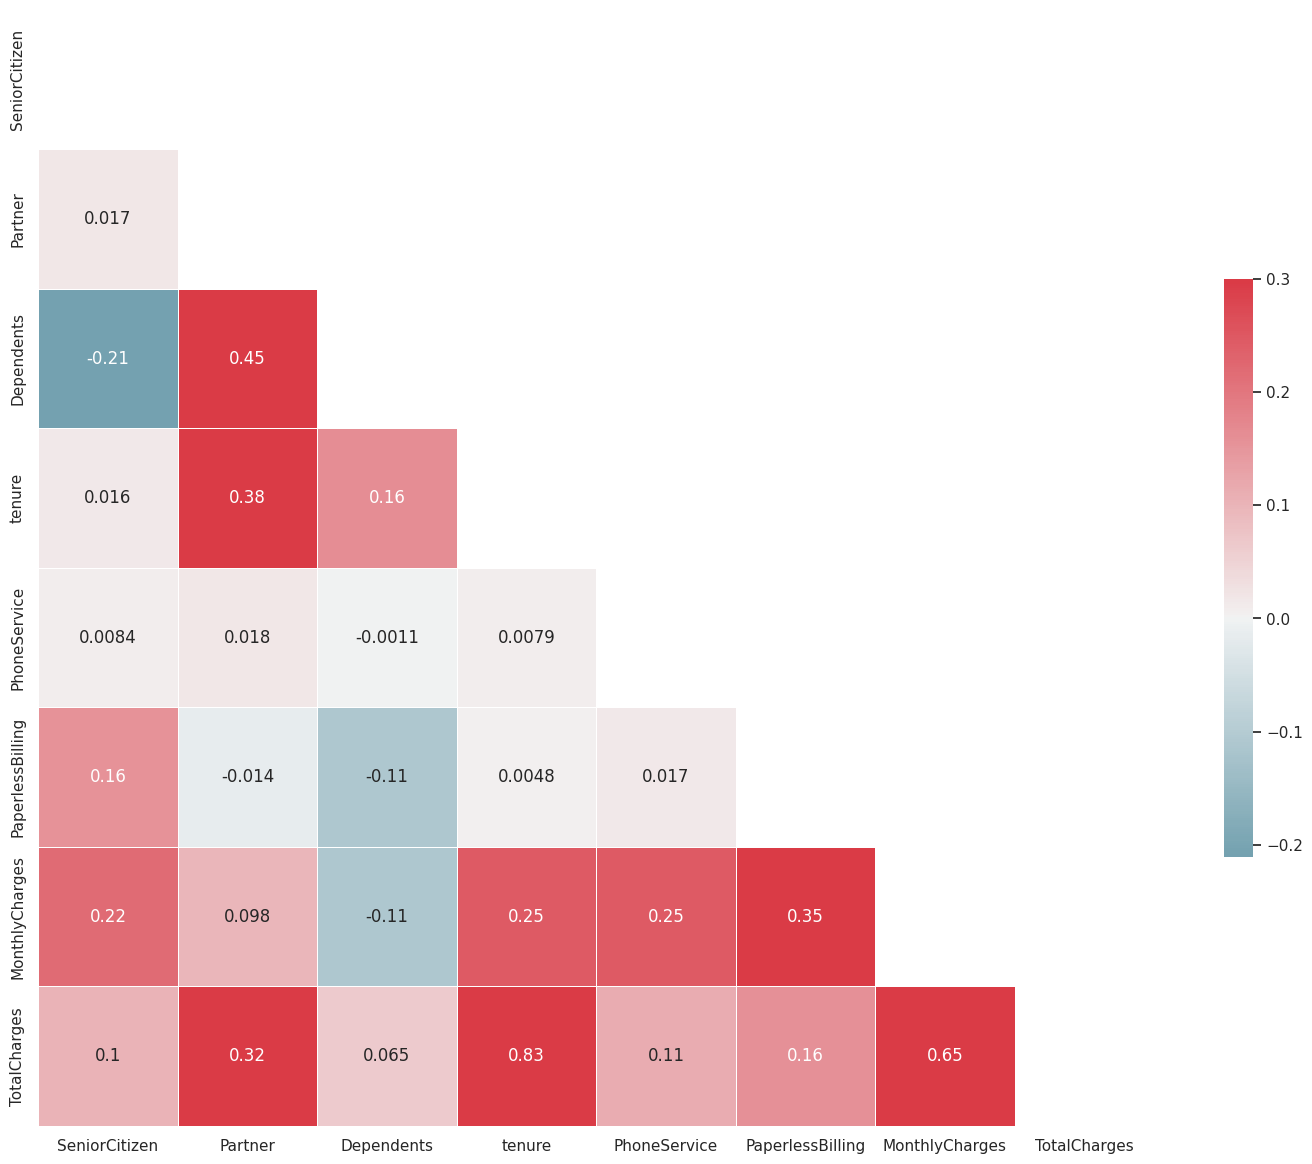

In [130]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = data2.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True,annot = True, linewidths=.5, cbar_kws={"shrink": .5})


##Multicollinearity check using VIF

##TODO

##calculating VIF for each feature

In [131]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


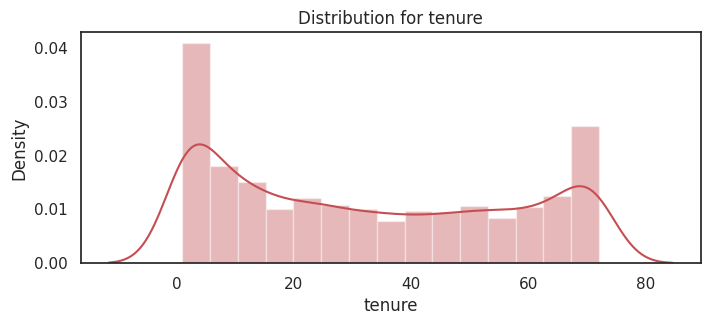

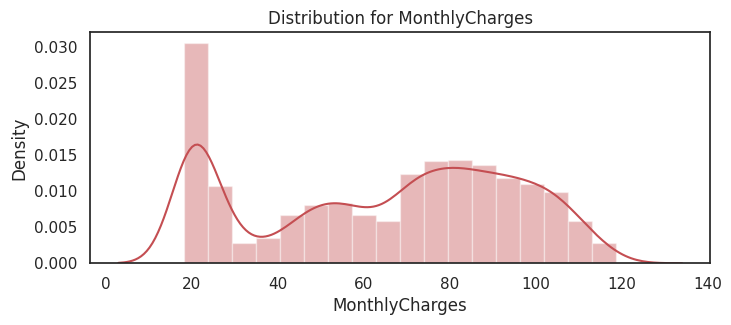

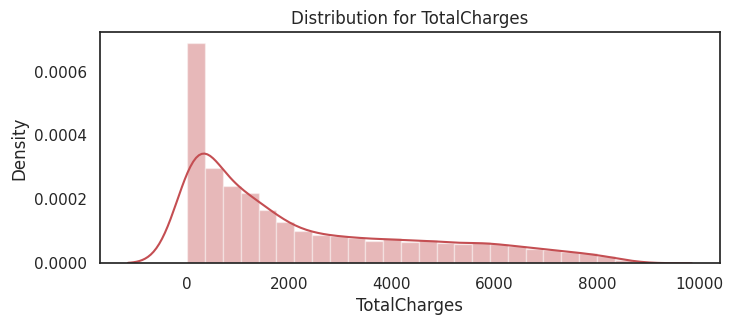

In [132]:
X = data.drop(columns = "Churn")
y = data["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

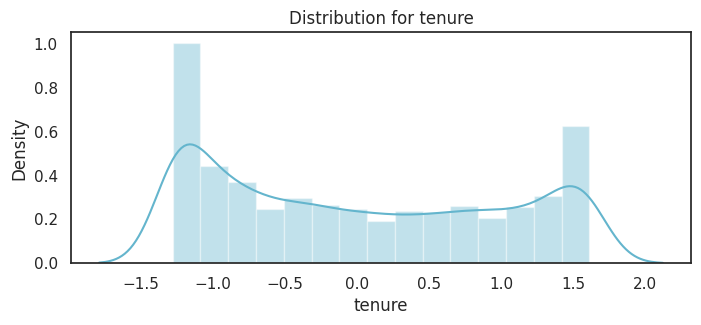

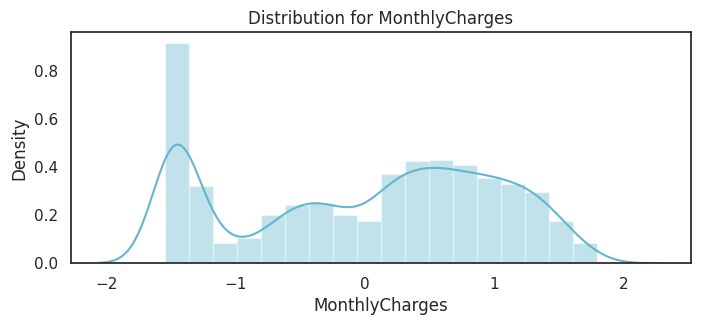

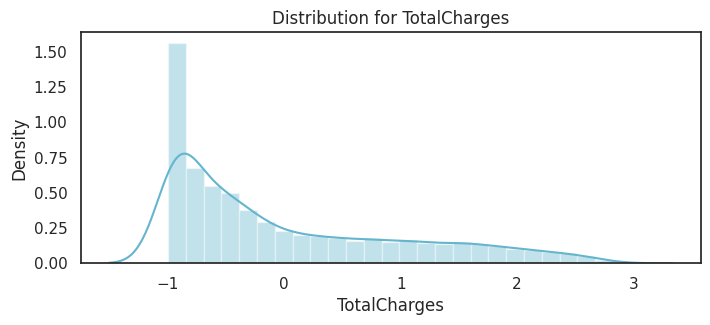

In [133]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [134]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
for i in data.columns:
    print(i, ": ", data[i].unique())

gender :  [0 1]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [1 0 2]
InternetService :  [0 1 2]
OnlineSecurity :  [0 2 1]
OnlineBackup :  [2 0 1]
DeviceProtection :  [0 2 1]
TechSupport :  [0 2 1]
StreamingTV :  [0 2 1]
StreamingMovies :  [0 2 1]
Contract :  [0 1 2]
PaperlessBilling :  [1 0]
PaymentMethod :  [2 3 0 1]
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [136]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['DeviceProtection', 'Dependents', 'Partner', 'PaperlessBilling', 'StreamingMovies', 'OnlineSecurity', 'TechSupport', 'gender', 'SeniorCitizen', 'PhoneService', 'OnlineBackup', 'MultipleLines', 'StreamingTV']


In [137]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')))


##Evaluating the model Results

In [138]:
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i] = [name,
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
9,Voting Classifier,84.82,1.36,79.95,2.08
8,Gradient boost classifier,84.62,1.44,79.36,2.05
7,Adaboost,84.39,1.41,79.93,1.89
0,Logistic Regression,84.30,1.27,74.64,1.66
1,SVC,82.94,1.32,79.07,1.44
6,Random Forest,82.92,2.02,78.83,1.94
4,Gaussian NB,82.19,2.20,75.38,1.60
2,Kernel SVM,79.68,1.66,79.34,1.86
3,KNN,77.21,2.33,75.82,1.76
5,Decision Tree Classifier,65.42,2.48,72.57,2.43


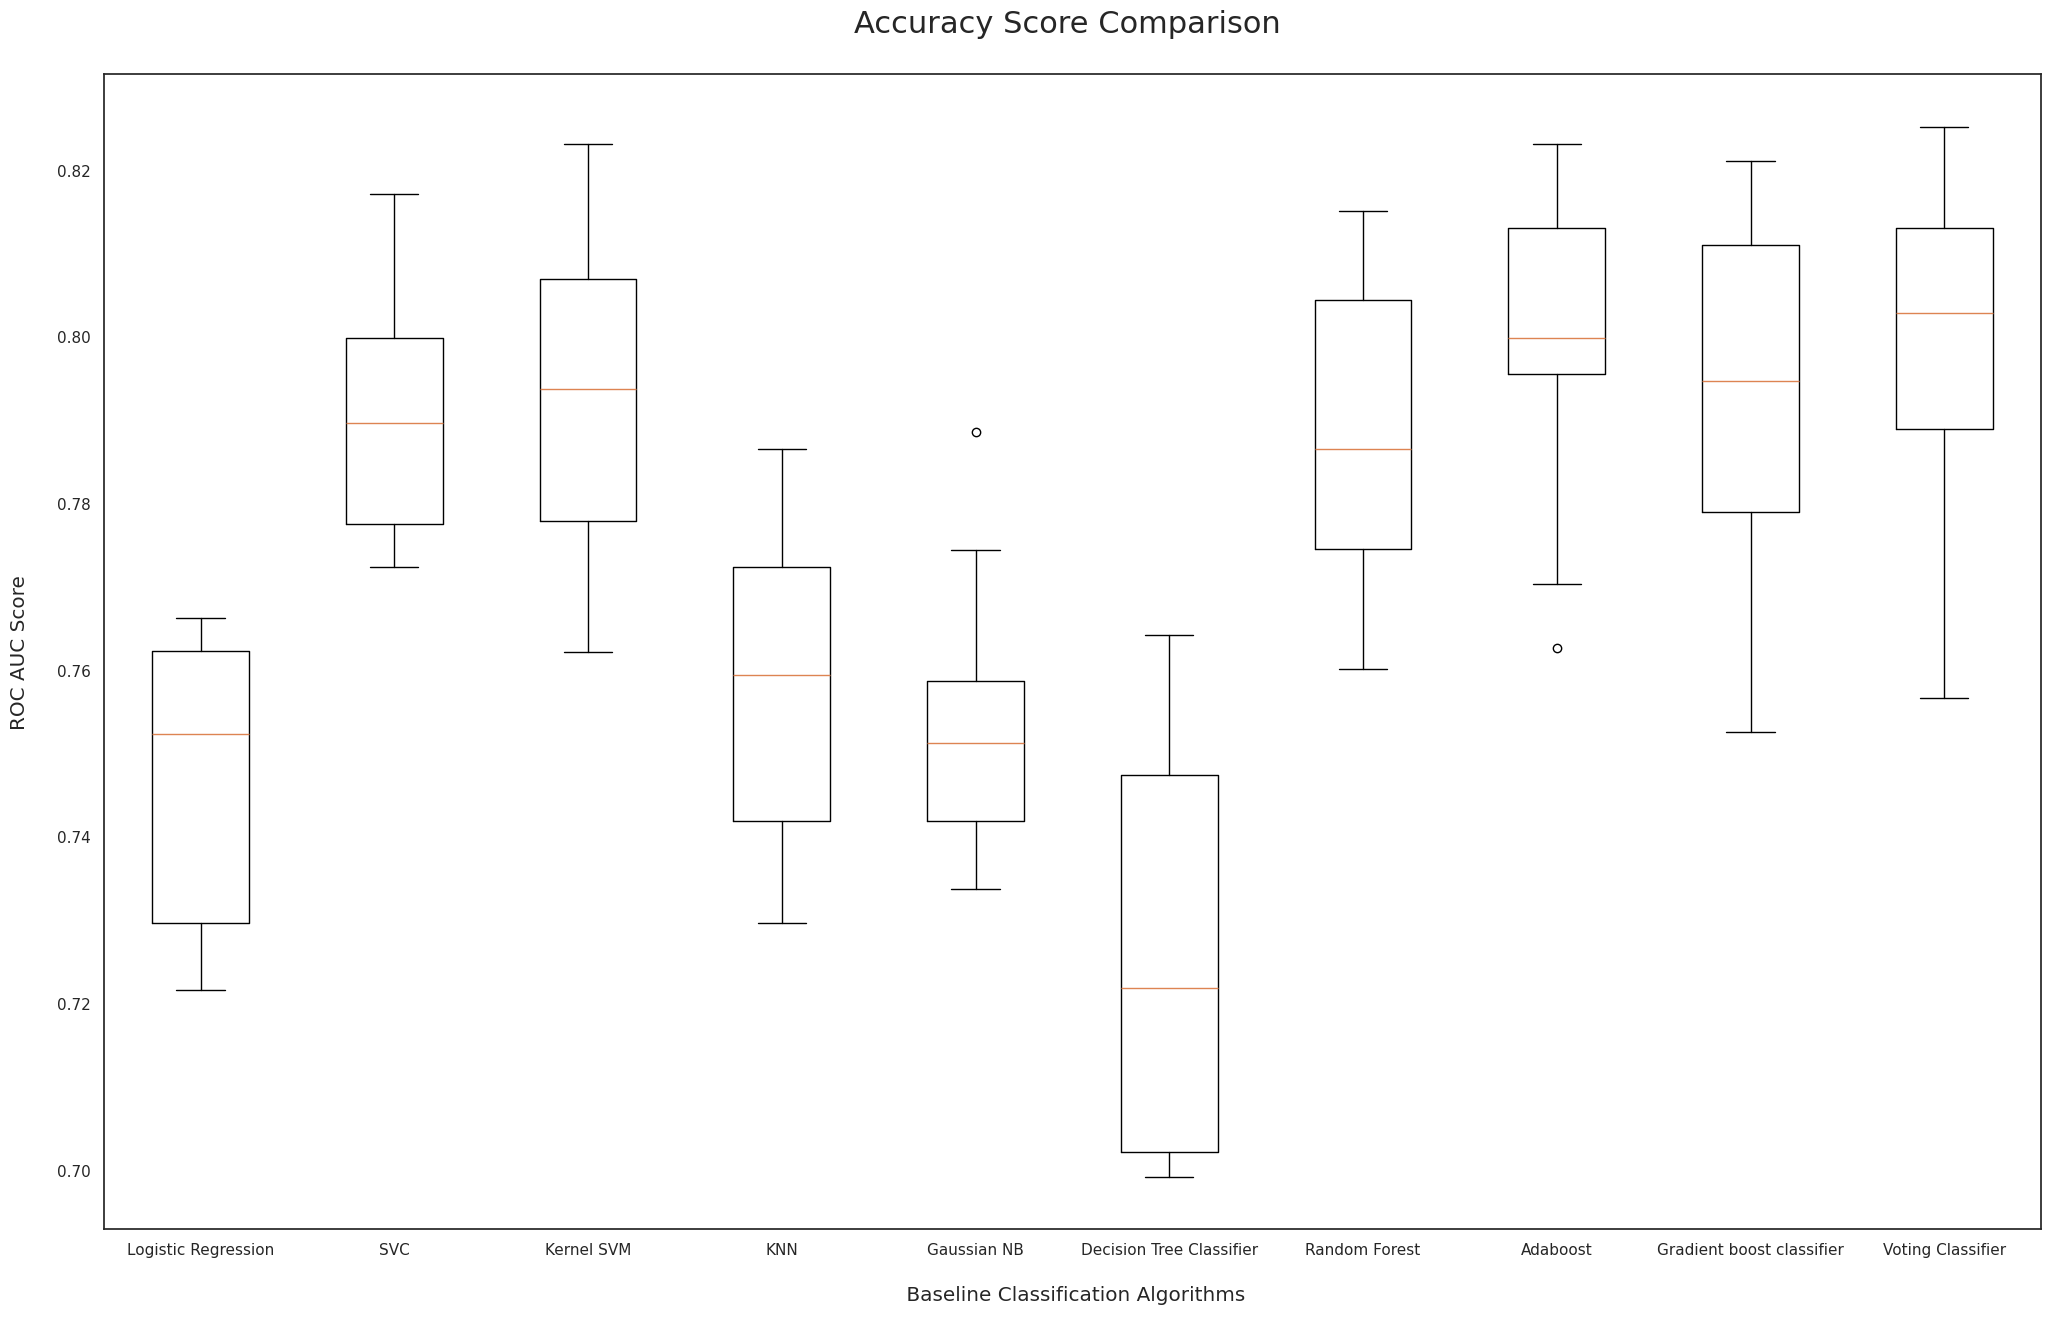

In [139]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

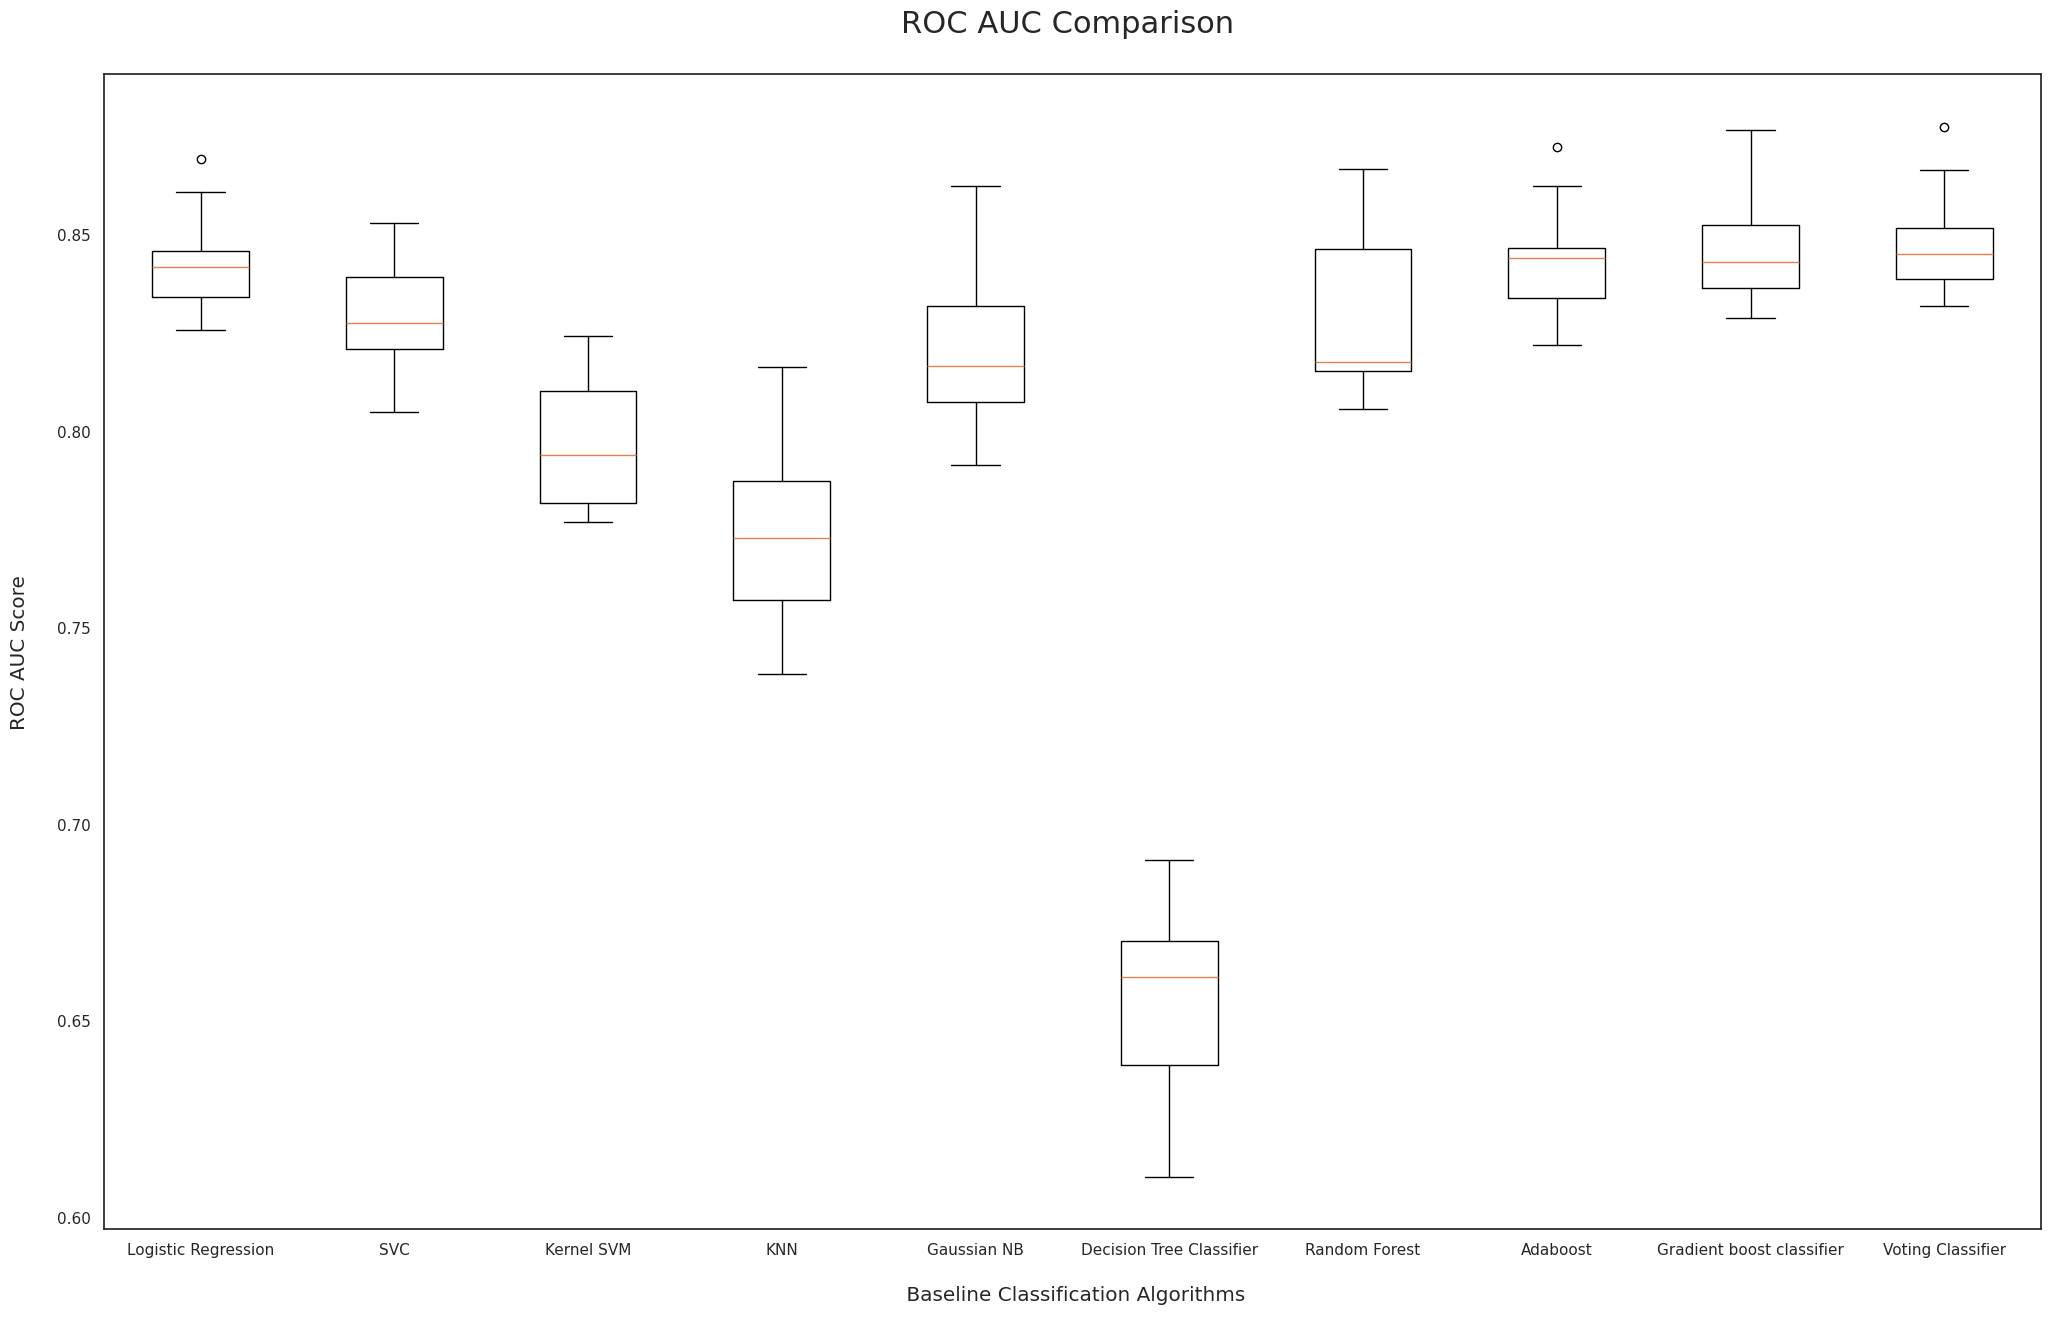

In [140]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [141]:
score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.7156398104265402,
 0.7573459715639811,
 0.7469194312796209,
 0.771563981042654,
 0.7720379146919432,
 0.7900473933649289,
 0.781042654028436,
 0.7843601895734598,
 0.776303317535545,
 0.785781990521327,
 0.7781990521327015,
 0.781042654028436,
 0.7781990521327015,
 0.7805687203791469,
 0.781042654028436,
 0.7853080568720379,
 0.7838862559241706,
 0.790521327014218,
 0.7890995260663507,
 0.790521327014218,
 0.790521327014218,
 0.7890995260663507,
 0.7914691943127962,
 0.7924170616113744]

##KNN

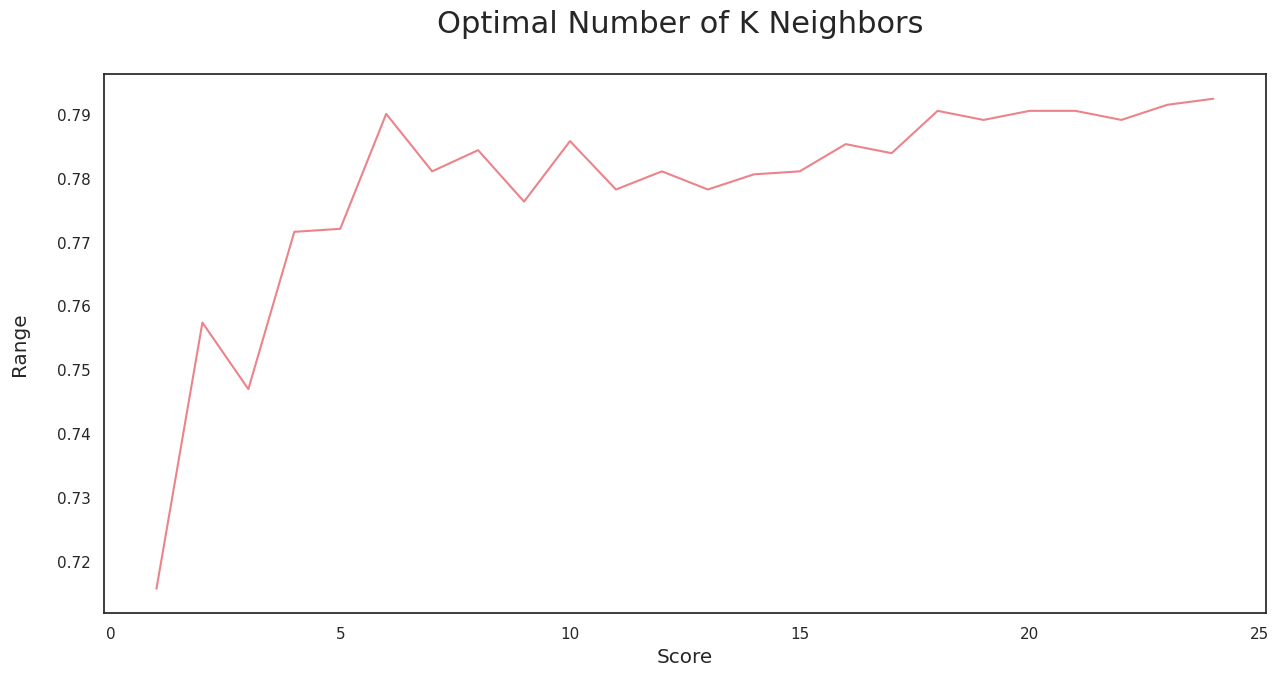

In [142]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

##Random Forest

In [143]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7109004739336493
2 : 0.7511848341232228
3 : 0.7374407582938388
4 : 0.7578199052132701
5 : 0.7568720379146919
6 : 0.7720379146919432
7 : 0.7592417061611374
8 : 0.7682464454976303
9 : 0.7658767772511849
10 : 0.7682464454976303
11 : 0.7668246445497631
12 : 0.7720379146919432
13 : 0.771563981042654
14 : 0.7758293838862559
15 : 0.7744075829383886
16 : 0.7781990521327015
17 : 0.7758293838862559
18 : 0.781042654028436
19 : 0.7777251184834123
20 : 0.776303317535545
21 : 0.7734597156398104
22 : 0.7805687203791469
23 : 0.7838862559241706
24 : 0.7853080568720379
25 : 0.7829383886255924
26 : 0.7890995260663507
27 : 0.7848341232227488
28 : 0.7848341232227488
29 : 0.7819905213270142
30 : 0.7853080568720379
31 : 0.7800947867298578
32 : 0.7834123222748816
33 : 0.781042654028436
34 : 0.781042654028436
35 : 0.7800947867298578
36 : 0.7800947867298578
37 : 0.7834123222748816
38 : 0.7805687203791469
39 : 0.781042654028436
40 : 0.7824644549763033
41 : 0.7838862559241706
42 : 0.7791469194312797
43 : 0.

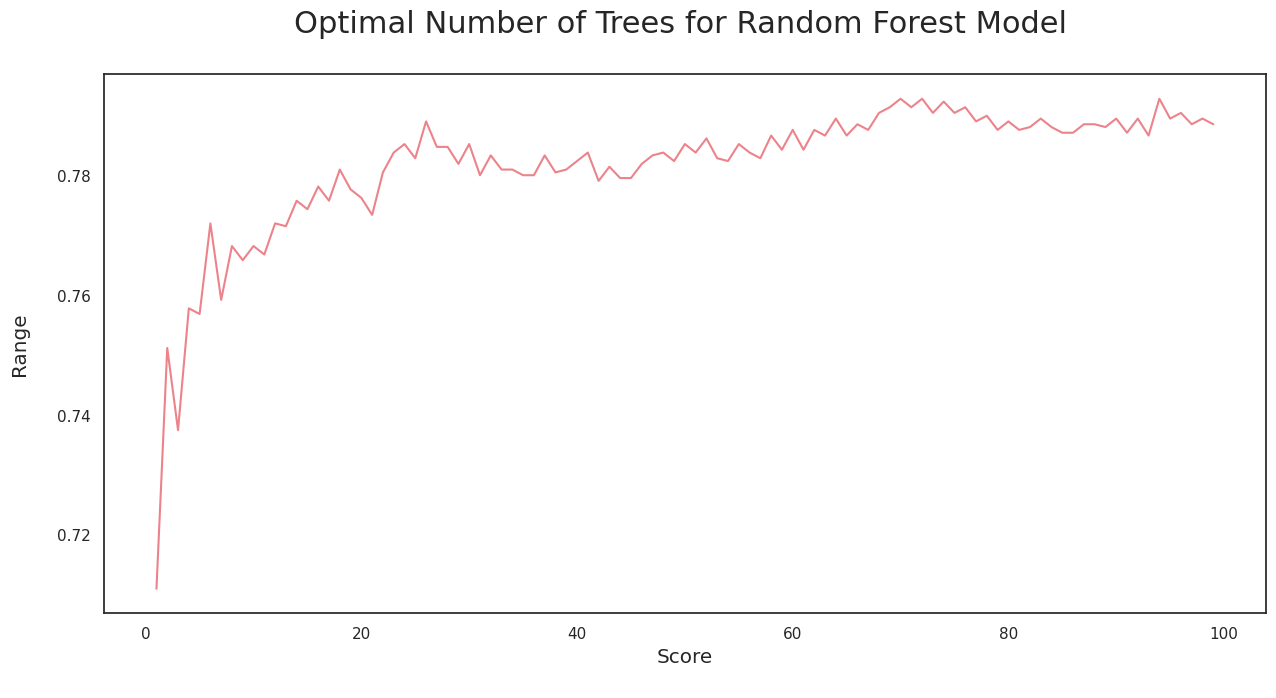

In [144]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

##2nd Iteration

In [145]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)





#Voting Classifier

classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()),
                                            ('abc', AdaBoostClassifier())], voting='soft')



classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

eval_ = pd.concat([lr, svm, knn, k_svm, nb, dt, rf, ab, gb, vc]).sort_values(["Precision",
"Recall", "F2 Score"], ascending = False).reset_index(drop=True)
eval_

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Adaboost,0.810427,0.683371,0.534759,0.600000,0.559076
1,Voting Classifier,0.809953,0.679372,0.540107,0.601787,0.563197
2,Gradient Boost,0.803791,0.666667,0.524064,0.586826,0.547486
3,Kernel SVM,0.793839,0.659898,0.463458,0.544503,0.492798
4,Logistic Regression,0.805213,0.657563,0.557932,0.603664,0.575368
5,Random Forest,0.796682,0.650685,0.508021,0.570571,0.531320
6,K-Nearest Neighbours,0.789100,0.628889,0.504456,0.559842,0.525241
7,SVM (Linear),0.788626,0.628635,0.500891,0.557540,0.522111
8,Naive Bayes,0.756872,0.531088,0.730838,0.615154,0.679708
9,Decision Tree,0.732701,0.497364,0.504456,0.500885,0.503022


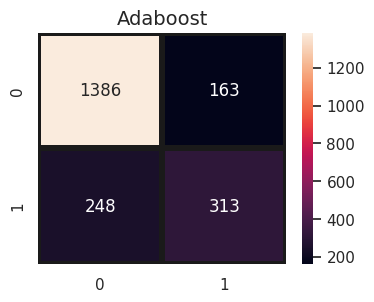

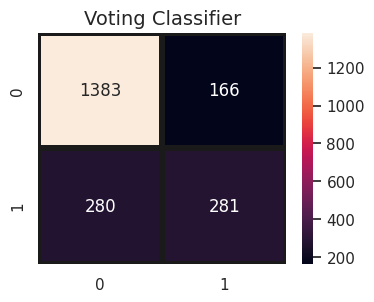

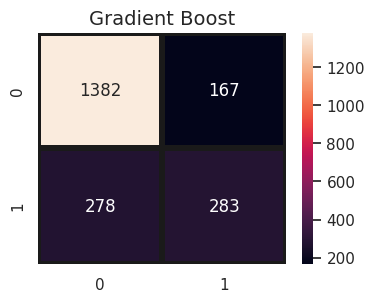

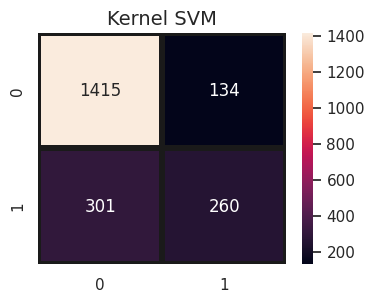

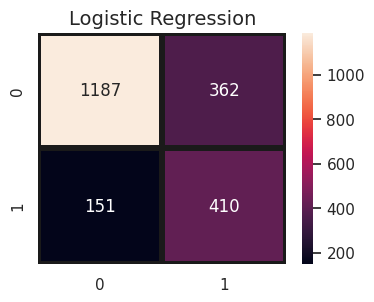

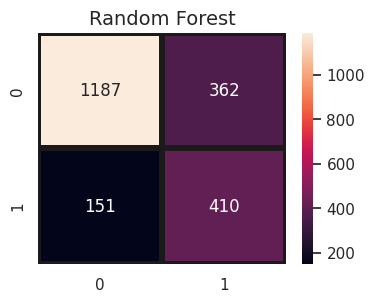

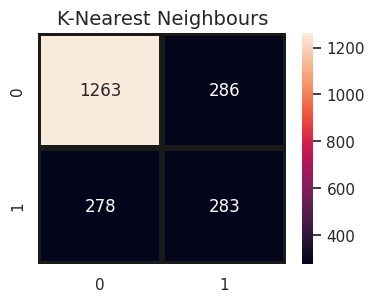

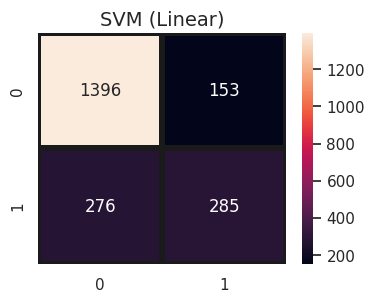

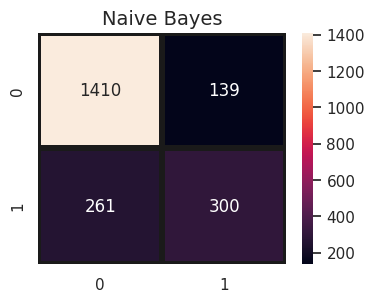

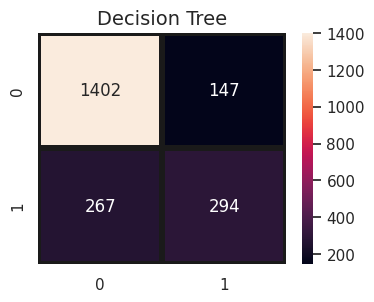

In [146]:
predictions = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()


##k-Fold Cross-Validation:
 Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set. So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [147]:
#TODO: Model Evaluation
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))
k_fold_cross_validation(classifier8, "Adaboost")

Adaboost accuracy: 0.80 (+/- 0.03)


In [148]:
k_fold_cross_validation(classifier10, "Voting classifier")

Voting classifier accuracy: 0.80 (+/- 0.04)


In [149]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.80 (+/- 0.04)


In [150]:
k_fold_cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.80 (+/- 0.04)


In [151]:
k_fold_cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.80 (+/- 0.03)


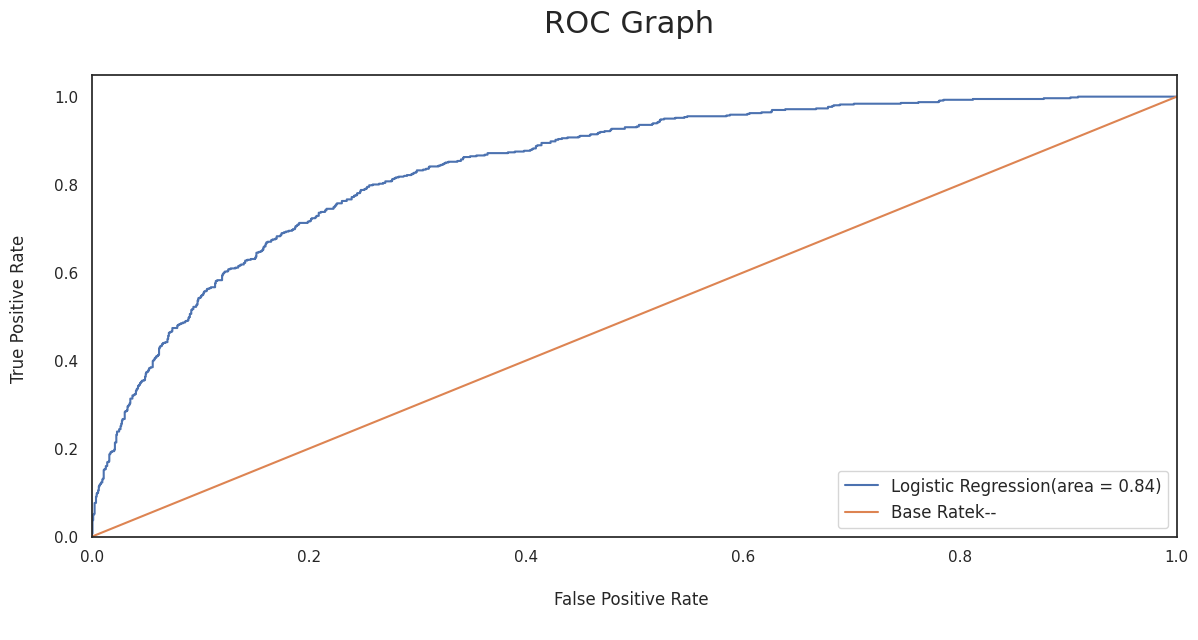

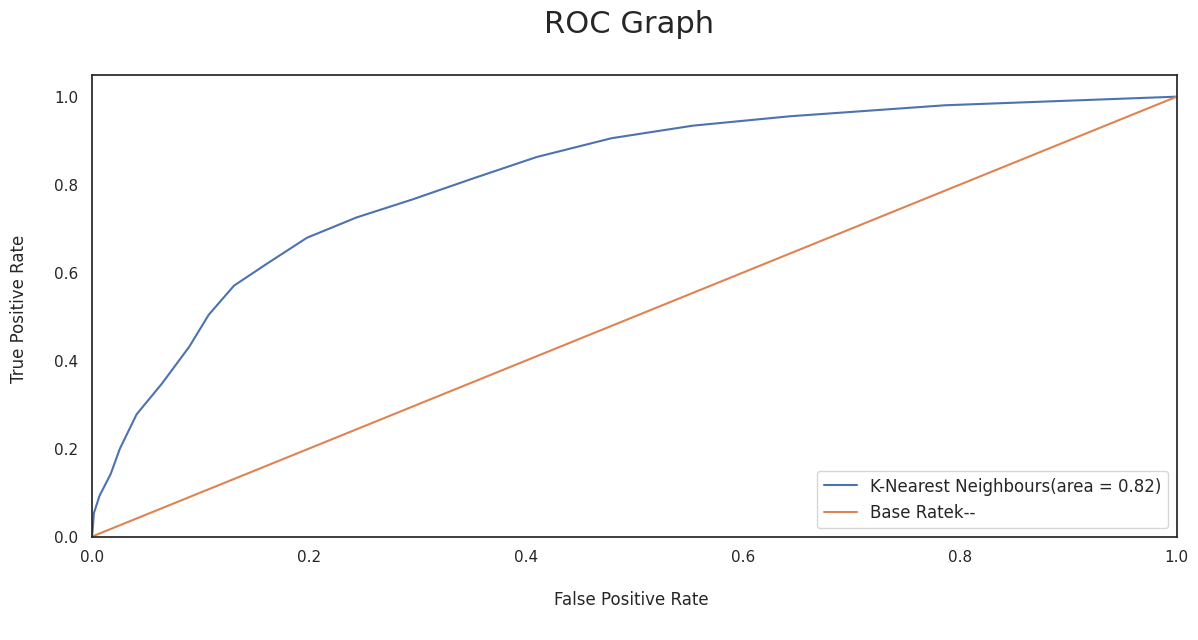

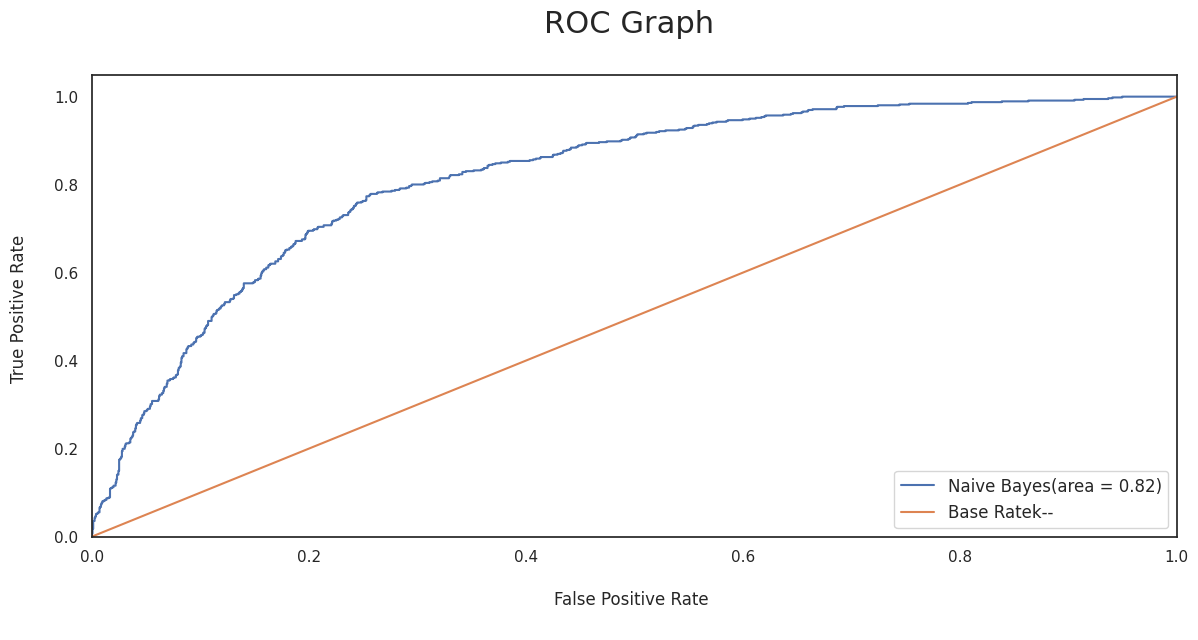

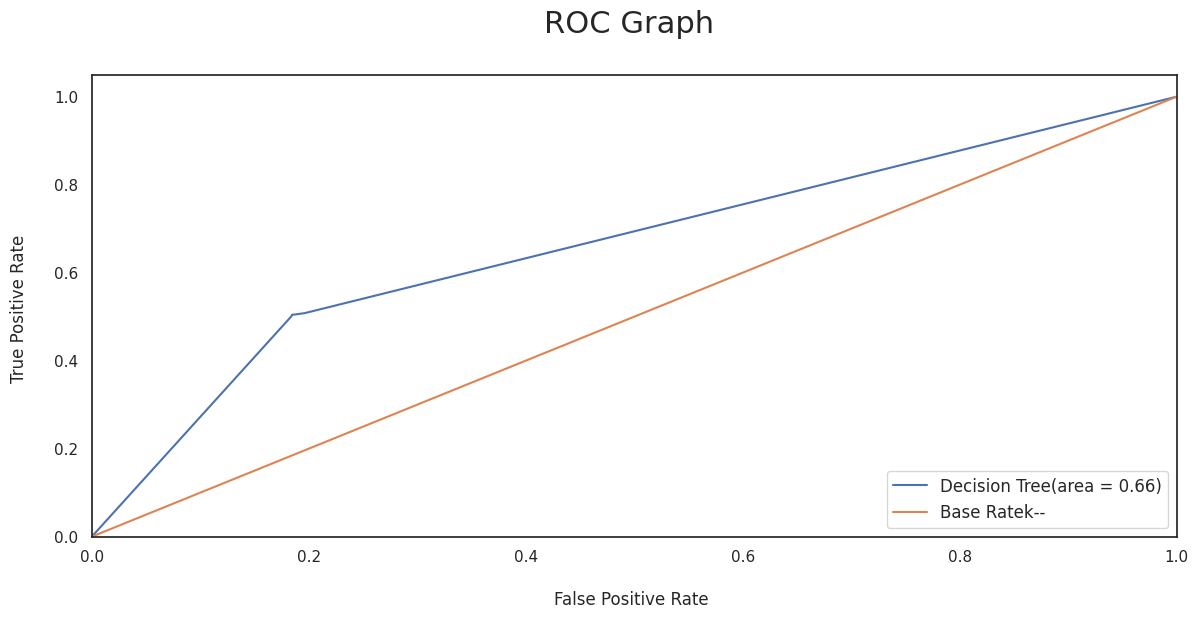

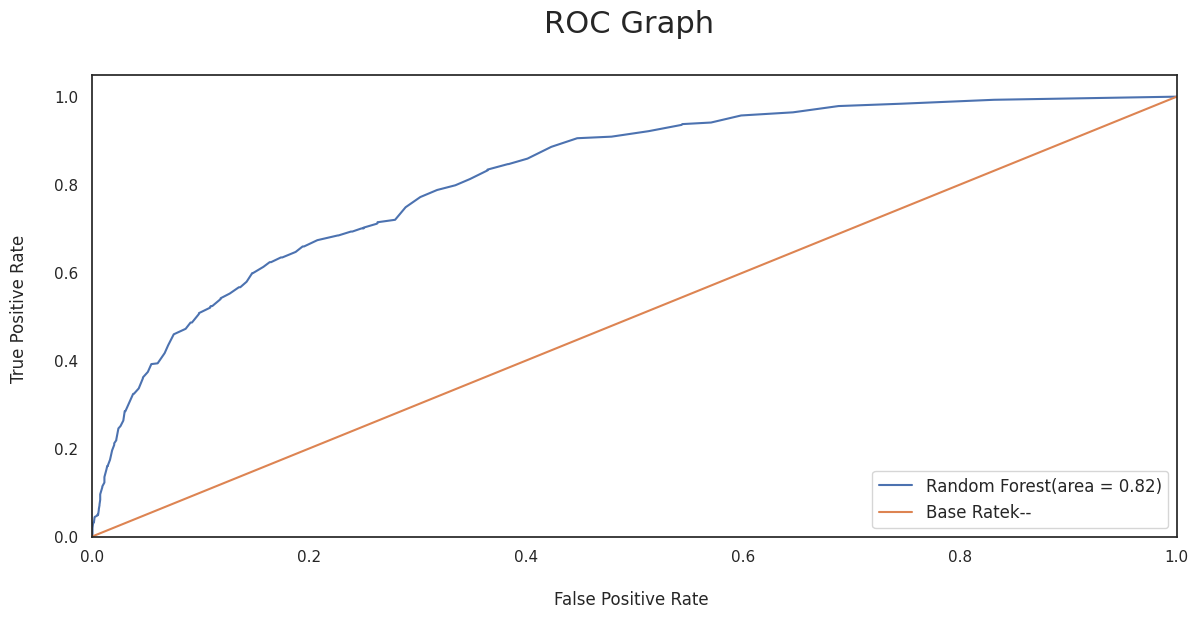

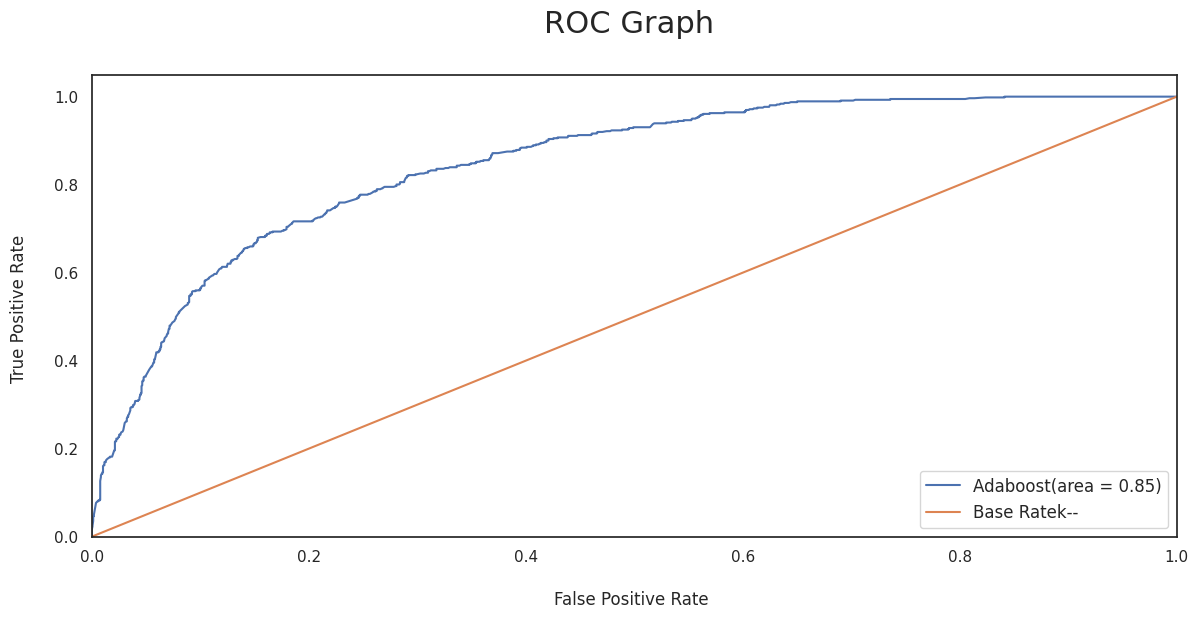

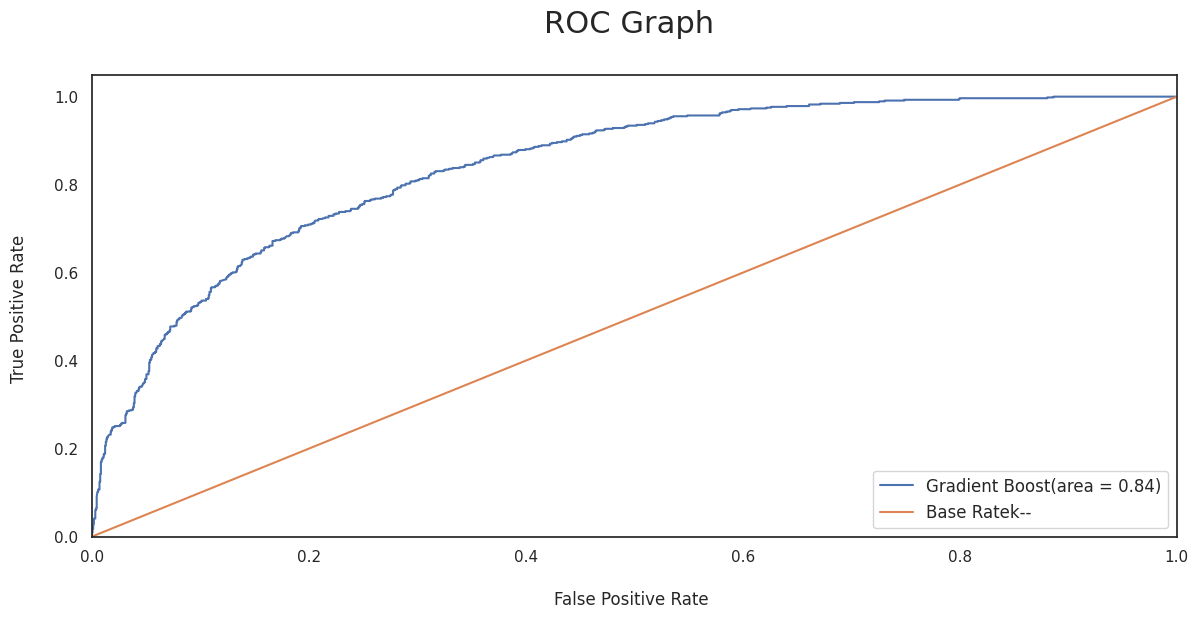

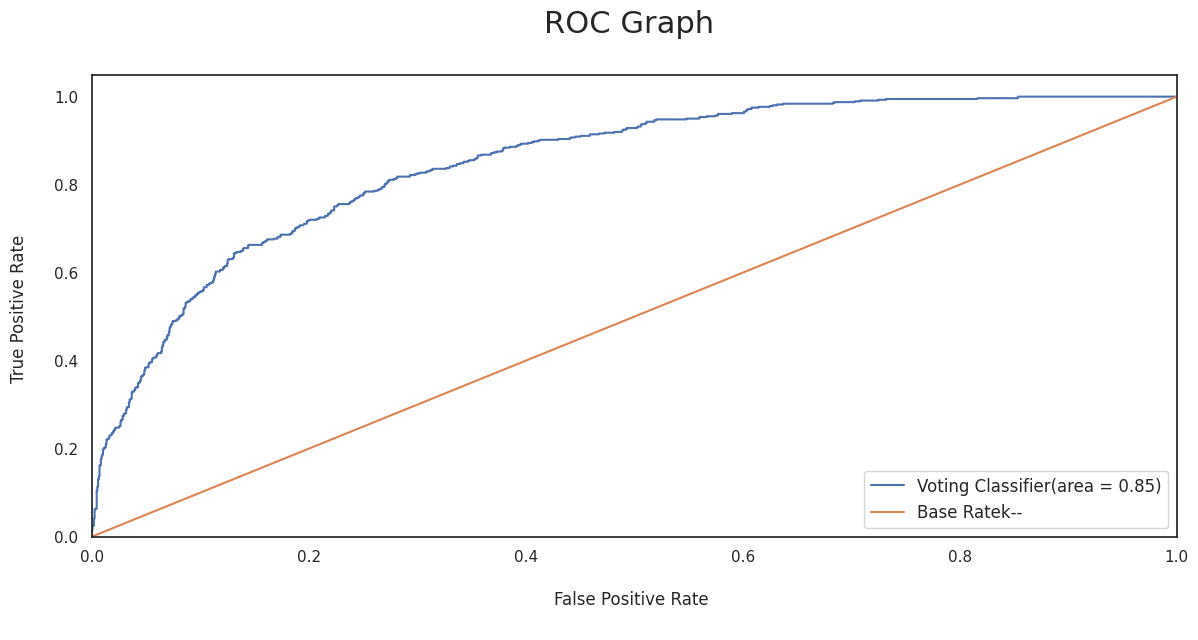

In [152]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train)
    probs = classifier_.predict_proba(X_test)
    probs = probs[:, 1]
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr,
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "22",
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()


preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9, classifier10]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost",  "Voting Classifier"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k)

In [153]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]

    return cvDict
cvD = cvDictGen(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [np.float64(0.8416708036007845),
  np.float64(0.01036736338041787)],
 'KNeighborsClassifier': [np.float64(0.7912424170555903),
  np.float64(0.00815238339692363)],
 'GaussianNB': [np.float64(0.8232386881685605),
  np.float64(0.00741678015498337)],
 'DecisionTreeClassifier': [np.float64(0.6470213137060805),
  np.float64(0.02196953973039052)],
 'RandomForestClassifier': [np.float64(0.8197874155380965),
  np.float64(0.011556155864106703)],
 'AdaBoostClassifier': [np.float64(0.8456874087554074),
  np.float64(0.01158471483584934)],
 'GradientBoostingClassifier': [np.float64(0.844659038173876),
  np.float64(0.010843555556023282)],
 'VotingClassifier': [np.float64(0.8479209039558591),
  np.float64(0.010750616371315446)]}

##Predicting feature importance

In [154]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier9.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
14,Contract,0.403857
4,tenure,0.142329
17,MonthlyCharges,0.134311
18,TotalCharges,0.108272
8,OnlineSecurity,0.064292
11,TechSupport,0.055280
7,InternetService,0.024546
16,PaymentMethod,0.012239
1,SeniorCitizen,0.011853
15,PaperlessBilling,0.009874


In [155]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
14,Contract,0.370713
17,MonthlyCharges,0.222401
4,tenure,0.172700
8,OnlineSecurity,0.089435
18,TotalCharges,0.031094
16,PaymentMethod,0.025114
11,TechSupport,0.023777
6,MultipleLines,0.017369
1,SeniorCitizen,0.017216
15,PaperlessBilling,0.016404


##Hyper Parameter tuning

##Using Randomized search CV

In [156]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [157]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100, 'learning_rate': 0.3}, np.float64(0.8442146832620013))

In [158]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)


np.float64(0.8443185126624158)

##Gradient Boost

In [159]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7af41056f110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7af4127fa030>},
                   scoring='roc_auc')

In [160]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 1, 'n_estimators': 319},
 np.float64(0.8462178398790512))

In [161]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)
# Getting the score AdaBoost
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

np.float64(0.8422005341839769)

##Using Grid SearchCV

In [162]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.3, n_estimators=420)
0.8467203923491919


In [163]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

np.float64(0.8443599401143167)


Reference: https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

##Gradient Boost

In [164]:
gb_param_grid = {'loss' : ['log_loss'],
                 'n_estimators': [10,100,200,300],
                 'max_depth': [1,2,4,6,8]}

gsGB = GridSearchCV(classifier9, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGB.fit(X_train,y_train)

gb_best = gsGB.best_estimator_
print(gb_best)
print(gsGB.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
GradientBoostingClassifier(max_depth=1, n_estimators=300)
0.8481591522663035


In [165]:
bestGBModFitted2 = gsGB.best_estimator_.fit(X_train, y_train)

test_labels_gb2 = bestGBModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_gb2 , average = 'macro', sample_weight = None)

np.float64(0.8403339973233261)